# MNIST
MNIST - a dataset of 70,000 images of handwritten digits (0, 1, 2, ... 9).<br>
Number of features for each picture: 785 (28x28 pixels per image, plus label)<br>

MNIST - available on <font color='blue'><b>OpenML</b></font> (<i>Open Machine Learning</i> - an open science online platform for ML, which holds open data, open algorithms and tasks: https://www.openml.org/)
#### More about MNIST:
https://www.openml.org/d/554<br>
<br>
<font color='blue'><b>Fetch</b></font> the MNIST dataset (<i>fetch</i> - retrieval of data by a software program, script, or hardware device; after being retrieved, the data is moved to an alternate location or displayed on a screen.)

In [14]:
import numpy as np
import pandas as pd


# Set print options:
# We want to print arrays or dataframes on the full page width in Jupyter Notebook

# Note: the following settings - determined after some trials

# Set some print options for NumPy arrays:

np.set_printoptions(edgeitems=60,    # Number of array items at the beginning and end of each dimension
                    linewidth=600,   # Number of characters per line 
                    precision=3)     # Number of digits for floating point numbers


# Set some print options for Pandas DataFrames:

pd.set_option('display.max_rows', 100)    # Maximum no. of DataFrame rows
pd.set_option('display.max_columns', 10)  # Maximum no. of DataFrame columns
pd.set_option('display.width', 600)       # Number of characters per line

In [15]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', version=1)  # Check that the MNIST filename on OpenML is mnist_784

# Once the MNIST dataset is downloaded and fetched as a dictionary, you can save it locally as a numpy array:
np.save('/home/marius/Curs_IA/Classification-ML/MNIST.npy', mnist)  # to see the path, use terminal to navigate to this
                                                        #  folder (eg. datasets), then issue the pwd command

# Now, you can comment all the lines from this cell. Next time you open the notebook, use only the following cell
# to load the saved MNIST dictionary.

/home/marius/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [16]:
%config IPCompleter.greedy=True  #activates Intellisense (and others); press Tab for commands, Shift+Tab for params


mnist = np.load('/home/marius/Curs_IA/Classification-ML/MNIST.npy', allow_pickle='TRUE').item()
                        # allow_pickle: allows loading pickled object arrays stored in npy files. 
                        # item(): converts back the saved array to a dictionary

print(mnist.keys())     # Datasets loaded by sklearn usualy have a dictionary structure 

# Remember about dictionaries:
# dic = {'Apt.1': 'Popescu', 'Apt.2': "Ionescu"}
# print(dic.keys())
# print(dic.values())
# print(dic.items())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


#### DESCR:
- key describing the dataset

#### data:
- key containing a pandas dataframe with one row per instance (one row for each handwritten digit) and one column per feature (one column for each pixel)

#### target:
- key containing a Pandas Series of labels (each label - what digit is represented in each row from data)

In [17]:
# print(mnist['DESCR'])
# print(mnist['url'])
# print(mnist['target'])


# Check to see the object type for 'data' and 'target':

print(type(mnist['target']))  # <class 'pandas.core.series.Series'> --> Pandas Series

print(type(mnist['data']))    # <class 'pandas.core.frame.DataFrame'> --> Pandas DataFrame; Or:

print(isinstance(mnist['data'], pd.DataFrame))  # True

print(mnist['data'])  # The first and last pixels are usually zero (they are close to the sides of the pictures)


# => print some pixels with values different from zero:

print(mnist['data'].loc[350:360, 'pixel350':'pixel359'])  # In Pandas "loc" function, the last index is also
                                                          # included in the selection (eg.: 360 and pixel 359)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
True
       pixel1  pixel2  pixel3  pixel4  pixel5  ...  pixel780  pixel781  pixel782  pixel783  pixel784
0         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
1         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
2         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
3         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
4         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
...       ...     ...     ...     ...     ...  ...       ...       ...       ...       ...       ...
69995     0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
69996     0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
69997     0.

In [18]:
# The MOST IMPORTANT MNIST keys are:

#       mnist['data']   -> DataFrame of all figures (on each row -> pixel intensities of one image)
#       mnist['target'] -> Pandas Series (one column) of labels


# In our ML project, we will use NumPy arrays instead of Pandas objects (ML algoritms like array structures):

X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy()  # X: array of images; y: array of targets (labels)


print(X.shape)  # (70000, 784); for eg., X[9] -> the 9-th digit from the set;
                #               each row has the 784 pixels of one image (28x28 pixels/img)

print(y.shape)  # (70000,)

print(y.dtype)  # object type (here, this means "string" type)

# Note: most ML algorithms expect numbers instead of strings => cast y to integer:
y = y.astype(np.uint8)  # here, astype() is a numpy method

print(X[350:361, 349:361])

(70000, 784)
(70000,)
object
[[  0.   0.   3. 146. 251. 250.  52.   0.   0.   0.   0.   0.]
 [  0. 180. 253. 251. 251. 142.   0.   0.   0.   0.   0.   0.]
 [254. 253. 207. 254. 253. 227.  42.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  39. 230. 252. 185.  21.   0.   0.   0.   0.]
 [  0.   0. 102. 253. 252. 102.   0.   0.   0.   0.   0.   0.]
 [ 83. 254. 254. 254. 183.  19.   0.   0.   0.   0.   0.   0.]
 [177. 253. 253. 253. 234.  19.   0.   0.   0.   0.   0.   0.]
 [ 47. 211. 253. 251. 235.  82.   0.   0.   0.   0.   0.   0.]
 [254. 254.  95.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 200. 254.  96.   0.]
 [239. 253. 253. 149.   0.   0.   0.   0.   0.   0.   0.   0.]]


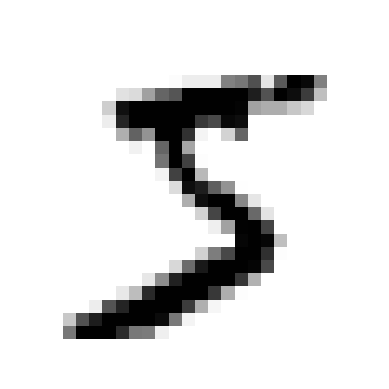

5


In [19]:
# Now, show the picture of one image from X:

import matplotlib.pyplot as plt


some_digit = X[0]  # the handwritten digit that we want to plot
# print(X[0])

some_digit_image = some_digit.reshape(28, 28)  # each image is 28x28 pixels => reshape X[0] (which is 1D)
                                               # to a 2D array

plt.imshow(some_digit_image, cmap='binary')  # prints the first figure (X[0]), using a reversed grayscale colormap
plt.axis('off')  # No coordinate axes
plt.show()

print(y[0])

MNIST is already split into a training set and a test set, and preprocessed (shuffled, images centered, etc.). The full set is arranged as follows:
- training set: first 60000 images;
- test set: last 10000 images.<br>

Let's see more handwritten digits from this dataset:
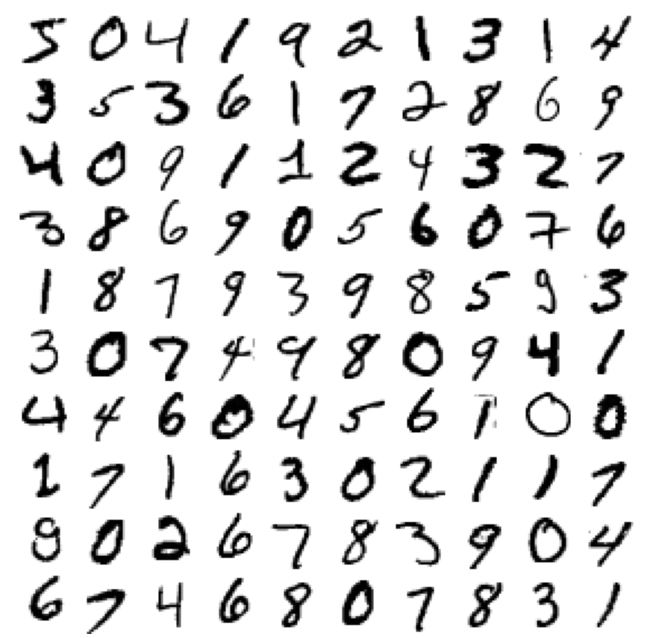

Now, select the training and test sets: 

In [20]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(y_train[:40])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0 7 6]


### At this moment, we have the following arrays:
- <font color='blue'><b>X</b></font>: the original array of data (70,000 images, 28x28 pixels = 784 values/row)
- <font color='blue'><b>y</b></font>: the original array of labels (target values)
- <font color='blue'><b>some_digit = X[0]</b></font>: image representing the first handwritten digit (5)
- <font color='blue'><b>X_train</b></font>: training set (first 60,000 images)
- <font color='blue'><b>y_train</b></font>: training labels (first 60,000 target values)
- <font color='blue'><b>X_test</b></font>: testing set (the last 10,000 images)
- <font color='blue'><b>y_test</b></font>: testing labels (the last 10,000 labels)

#### Let's train a model to identify <u>only one</u> handwritten digit, for example 5. A <font color='blue'><b>binary classifier</b></font> we be used.
#### Training steps:
1. Prepare the following target vectors (labels) for binary classification; labels should be <i>True</i> and <i>False</i> instead of numbers from 0 to 9:
- <font color='blue'><b>y_train_5</b></font>: a vector of <u>training</u> labels, consisting of <i>True</i> when 5 is found in <font color='blue'><b>y_train</b></font>, and <i>False</i> otherwise;
- <font color='blue'><b>y_test_5</b></font>: a vector of <u>testing</u> labels consisting of <i>True</i> when 5 is found in <font color='blue'><b>y_test</b></font>, and <i>False</i> otherwise.

2. Use <font color='blue'><b>Stochastic Gradient Descent</b></font> as a binary classifier (works with instances one at a time => good for online training):
- use the <font color='blue'><b>SGDClassifier</b></font> class to define an object; name this object <i><b>sgd_clf</b></i>;
- train <i><b>sgd_clf</b></i> on <i><b>X_train</b></i> and <i><b>y_train_5</b></i> (use the <i><b>fit</b></i> method);

3. Check various images from <i><b>X</b></i> to detect if they are number 5 or not (use the <i><b>predict</b></i> method of <i><b>sgd_clf</b></i>).

In [21]:
# 1. Prepare the target vectors (labels) for this binary classification:
# ----------------------------------------------------------------------

y_train_5 = (y_train == 5)  # use the mask "y_train_5" -> vector of True (when 5 is found) and False (otherwise)

y_test_5 = (y_test == 5)

print(y_train_5[:15])  # Check to see if the results are good: [True False False False False ...]

print(y_train[:15])    # [5 0 4 1 9 ...]

# Note: this approach will train the classifier to associate images with True (and not with 5) or False.
# So,the classifier will tell us: this image is True, this one is False, the next one is also False, etc.

[ True False False False False False False False False False False  True False False False]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [22]:
# 2. Use Stochastic Gradient Descent as a binary classifier (works with one image at a time):
# -------------------------------------------------------------------------------------------

from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(n_jobs=-1, random_state=42)  # random_state: same random results every time we run
                                                     # this line of code (SGD works randomly)
%time sgd_clf.fit(X_train, y_train_5)                # trains the SGD model

# The above line: a kind of regression, with images from X_train that correspond to True or False (from y_train_5)

CPU times: user 14.7 s, sys: 210 µs, total: 14.7 s
Wall time: 14.7 s


SGDClassifier(n_jobs=-1, random_state=42)

In [23]:
# 3. Detect images representing number 5:
# --------------------------------------

result_1 = sgd_clf.predict([X[0]])  # returns True  => the classifier finds out that X[0] is 5;

result_2 = sgd_clf.predict([X[4]])  # returns False => the classifier finds out that X[4] is not 5;

# Instead, only one line of code can be used:
# result = sgd_clf.predict([X[0], X[4]])

print(f"{result_1}; {result_2}")

[ True]; [False]


# MODEL EVALUATION

## To be discussed:
- Common evaluation procedures
- About <font color='blue'>classification accuracy</font> and its limitations;
- How to describe the performance of a classifier using a <font color='blue'>confusion matrix</font>;
- Various <b>metrics (indici de performanta)</b> computed from the confusion matrix;
- Changing the <font color='blue'>classification threshold</font> to adjust the classifier performance;
- How to interpret the <font color='blue'>ROC curves</font>;
- How to interpret and use the <font color='blue'>Area Under the Curve (AUC)</font>.

## About model evaluation:
1. How to choose between different models: tune parameters and features, use different types of models;
2. Estimate how well the model generalizes on <font color='blue'>out-of-sample</font> data (for example, on test set), using one of the following <font color='blue'>model evaluation procedures</font>:
    - <b>Training and testing on the same dataset</b>: usualy overfits the training data (doesn't generalize well on out-of-saple data); it is not a useful method;<br><br>
    - <b>Train/test split</b> uses 2 datasets: one for training and the other one for testing (model is trained and tested <b>on different data</b>); <u>disadvantage</u>: <i>high variance</i> estimates; <u>advantages</u>: simplicity and speed;<br><br>
    - <b>K-Fold Cross-Validation</b>: creates and runs a number of <b>K</b> train/test splits, and averages the results; better estimate on out-of-sample data; <u>disadvantage</u>: K times slower than the train/test split procedure.<br><br>
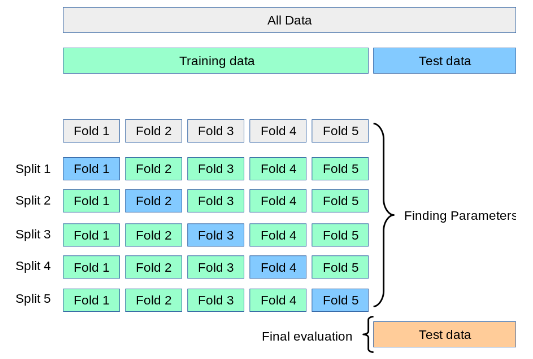

3. Quantify the model performance using a <font color='blue'>model evaluation metric</font>:
    - For <b>regression</b>: RMSE (Root Mean Squared Error), MSE (Mean Squared Error), MAE (Mean Absolute Error).
    - For <b>classification</b>: classification accuracy, confusion matrix, and other tools (to be discussed).

## Method 1 - Use Cross-Validation to Measure <font color='blue'>Classification Accuracy</font>

### Procedure:
Use the <font color='blue'>cross_val_score()</font> function to <u>train, make predictions, and evaluate</u> the <b>sgd_clf</b> estimator on <b>K = 3</b> train/test subsets (splits) and return the accuracy for each of them:<br><br>
(About cross_val_score: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)<br>
(About cross validation: https://scikit-learn.org/stable/modules/cross_validation.html)

In [24]:
from sklearn.model_selection import cross_val_score


cls_acc = cross_val_score(sgd_clf,             # the Stochastic Gradient Descent object to be trained
                          X_train,             # training set
                          y_train_5,           # training labels
                          cv=3,                # K (number of subsets)
                          n_jobs=-1,           # Use parallel processing with all CPUs
                          scoring="accuracy")  # returns the accuracy for each fold (also called subset, or split)

print(f"Accuracies for each subset: {cls_acc}")     # array([0.95, 0.96, 0.96])

print(f"Mean accuracy: {cls_acc.mean().round(3)}")  # 0.957

Accuracies for each subset: [0.95 0.96 0.96]
Mean accuracy: 0.957


### Some words about <u>classification accuracy</u>:
- Is the <u>proportion of the correct predictions</u> (number of correct predictions divided by the total number of predictions; in ce masura modelul antrenat a raspuns corect);<br><br>
- <u>Goal</u>: to make the fewest number of mistakes;<br><br>
- <u>Issue with biased datasets</u> (dataseturi dezechilibrate, de exemplu prea putine valori True si prea multe valori False, in cazul clasificarii binare):<br>
   (1) if only a small percent of data are <i>True</i> labels, and <br>
   (2) if our model predicts everything as <i>False</i> (including when the actual values are <i>True</i>) =><br>
   (3) the final accuracy will be very high.<br><br>
   For example, if only 6% of labels are <i>True</i> => 94% are <i>False</i> => the classification accuracy of a "dumb" model that always predicts <i>False</i> will always be 94%!

### Important:
When using <b>accuracy</b>, compare the result with <font color='blue'>Null accuracy</font>: accuracy that could be achieved by always predicting the most frequent class (the % of the most frequent class). The <i>Null Accuracy</i> in the above example is 94%.<br><br>
In our case:<br>
the most frequent class is <i>False</i> because, from a total of 60000 images, <b>y_train_5</b> has 5421 images of 5-s (9%)<br> => only 9% of the dataset is the class of <i>True</i><br>
=> <b>Null accuracy = 91%</b> !!!<br>
=> Our model performed only slightly better than the <b>Null accuracy</b> (if the model would predict all the time <i>False</i>, it would have an accuracy of 91%!).

In [25]:
# How to find the number of instances in a BINARY dataset:
# -------------------------------------------------------

np.count_nonzero(y_train_5)  # 5421;  Counts the number of non-zero values into an array
                             #        https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html
# Or:

# np.sum(y_train_5)          # 5421; True values are considered 1, while False values are considered 0.

# Or:

# np.bincount(y_train_5)  # Returns the CLASS DISTRIBUTION (here, the number of non_5-s and 5-s: 54579, 5421)
#                         # https://numpy.org/doc/stable/reference/generated/numpy.bincount.html


# Total number of instances in the dataset (remember numpy "size"):

# y_train_5.size  # 60000

5421